In [132]:
import pystan
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pickle

In [133]:
#### Preprocecing ###

In [134]:
jh_dir = "../../COVID-19"

In [135]:
Confirmed = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [136]:
df = Confirmed.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
confirmed = df
confirmed = confirmed.cummax()

In [137]:
df = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df = df.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
recovered = df.cummax()

In [138]:
df = pd.read_csv(jh_dir + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df = df.groupby("Country/Region").sum()
df = df.drop(["Lat", "Long"], 1)
df = df.T
df = df.set_index(pd.to_datetime(df.index))
death = df.cummax()

In [139]:
### Data Preparation ###

In [140]:
country = 'Japan'
epoch = pd.to_datetime('2020-01-22')
last = pd.to_datetime('2020-04-28')
C0 = confirmed.loc[epoch:last, country].values
R0 = (recovered).loc[epoch:last, country].values
D0 = death.loc[epoch:last, country].values
P = 12000_0000
iteration=2000
repeat = 1000

In [141]:
data = {'T': C0.shape[0], 'T0': 0, 'P': P, 'C0': C0, 'R0': R0, 'D0':D0}

In [142]:
### Model ###

In [143]:
sm_const = pystan.StanModel(file="const.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bc6d31dd51996c751224e95703ac4eef NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bc6d31dd51996c751224e95703ac4eef NOW.


In [144]:
sm_every = pystan.StanModel(file="everyday.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fbc61a4e98647df601fe416f41355090 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fbc61a4e98647df601fe416f41355090 NOW.


In [145]:
# Train the model and generate samples
inits = 'random'
fit_const = sm_const.sampling(data=data, iter=iteration, init=inits)
fit_const


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_bc6d31dd51996c751224e95703ac4eef.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf  15.84    0.05    3.5   9.55  13.37  15.68  18.14  23.06   4111    1.0
b          0.07  1.6e-5 8.5e-4   0.07   0.07   0.07   0.07   0.08   2877    1.0
q           1.0  8.9e-6 7.2e-4    1.0    1.0    1.0    1.0    1.0   6468    1.0
NI[1]      1.31    0.01   0.81   0.09   0.68   1.21   1.83   3.04   3500    1.0
NI[2]      1.37    0.01   0.85   0.09   0.72   1.28   1.92    3.3   4121    1.0
NI[3]      1.46    0.01   0.93   0.09   0.73   1.35   2.03   3.59   3931    1.0
NI[4]      2.48    0.02   0.93   0.83   1.83   2.43   3.09   4.39   3562    1.0
NI[5]      1.62    0.02   0.97   0.11   0.84   1.52   2.27   3.73   3522    1.0
NI[6]      3.13    0.01    1.0   1.36   2.43   3.06


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_bc6d31dd51996c751224e95703ac4eef.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf  15.84    0.05    3.5   9.55  13.37  15.68  18.14  23.06   4111    1.0
b          0.07  1.6e-5 8.5e-4   0.07   0.07   0.07   0.07   0.08   2877    1.0
q           1.0  8.9e-6 7.2e-4    1.0    1.0    1.0    1.0    1.0   6468    1.0
NI[1]      1.31    0.01   0.81   0.09   0.68   1.21   1.83   3.04   3500    1.0
NI[2]      1.37    0.01   0.85   0.09   0.72   1.28   1.92    3.3   4121    1.0
NI[3]      1.46    0.01   0.93   0.09   0.73   1.35   2.03   3.59   3931    1.0
NI[4]      2.48    0.02   0.93   0.83   1.83   2.43   3.09   4.39   3562    1.0
NI[5]      1.62    0.02   0.97   0.11   0.84   1.52   2.27   3.73   3522    1.0
NI[6]      3.13    0.01    1.0   1.36   2.43   3.06

In [146]:
# Train the model and generate samples
inits = 'random'
fit_every = sm_every.sampling(data=data, iter=iteration, init=inits)
fit_every


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_fbc61a4e98647df601fe416f41355090.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   1.82    0.02   1.09   0.44   1.08   1.58   2.27    4.7   2509    1.0
b_beta     0.04  1.4e-4 6.1e-3   0.03   0.04   0.04   0.05   0.06   1843    1.0
b[1]       0.26  3.2e-3   0.13   0.04   0.17   0.25   0.34   0.55   1745    1.0
b[2]       0.26  3.0e-3   0.12   0.06   0.18   0.25   0.34   0.53   1622    1.0
b[3]       0.27  2.7e-3   0.11   0.08   0.19   0.26   0.34   0.51   1774    1.0
b[4]       0.27  2.3e-3    0.1    0.1    0.2   0.26   0.33    0.5   1996    1.0
b[5]       0.26  2.2e-3    0.1    0.1    0.2   0.26   0.32   0.47   1815    1.0
b[6]       0.26  2.1e-3   0.09   0.11    0.2   0.25   0.32   0.46   1918    1.0
b[7]       0.25  1.8e-3   0.08    0.1   0.19   0.24


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_fbc61a4e98647df601fe416f41355090.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   1.82    0.02   1.09   0.44   1.08   1.58   2.27    4.7   2509    1.0
b_beta     0.04  1.4e-4 6.1e-3   0.03   0.04   0.04   0.05   0.06   1843    1.0
b[1]       0.26  3.2e-3   0.13   0.04   0.17   0.25   0.34   0.55   1745    1.0
b[2]       0.26  3.0e-3   0.12   0.06   0.18   0.25   0.34   0.53   1622    1.0
b[3]       0.27  2.7e-3   0.11   0.08   0.19   0.26   0.34   0.51   1774    1.0
b[4]       0.27  2.3e-3    0.1    0.1    0.2   0.26   0.33    0.5   1996    1.0
b[5]       0.26  2.2e-3    0.1    0.1    0.2   0.26   0.32   0.47   1815    1.0
b[6]       0.26  2.1e-3   0.09   0.11    0.2   0.25   0.32   0.46   1918    1.0
b[7]       0.25  1.8e-3   0.08    0.1   0.19   0.24

In [147]:
print(fit_every)

Inference for Stan model: anon_model_fbc61a4e98647df601fe416f41355090.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf      1.82    0.02   1.09   0.44   1.08   1.58   2.27    4.7   2509    1.0
b_beta        0.04  1.4e-4 6.1e-3   0.03   0.04   0.04   0.05   0.06   1843    1.0
b[1]          0.26  3.2e-3   0.13   0.04   0.17   0.25   0.34   0.55   1745    1.0
b[2]          0.26  3.0e-3   0.12   0.06   0.18   0.25   0.34   0.53   1622    1.0
b[3]          0.27  2.7e-3   0.11   0.08   0.19   0.26   0.34   0.51   1774    1.0
b[4]          0.27  2.3e-3    0.1    0.1    0.2   0.26   0.33    0.5   1996    1.0
b[5]          0.26  2.2e-3    0.1    0.1    0.2   0.26   0.32   0.47   1815    1.0
b[6]          0.26  2.1e-3   0.09   0.11    0.2   0.25   0.32   0.46   1918    1.0
b[7]          0.25  1.8e-3   0.08    0.1   0.19   0.24    0.3   

Inference for Stan model: anon_model_fbc61a4e98647df601fe416f41355090.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf      1.82    0.02   1.09   0.44   1.08   1.58   2.27    4.7   2509    1.0
b_beta        0.04  1.4e-4 6.1e-3   0.03   0.04   0.04   0.05   0.06   1843    1.0
b[1]          0.26  3.2e-3   0.13   0.04   0.17   0.25   0.34   0.55   1745    1.0
b[2]          0.26  3.0e-3   0.12   0.06   0.18   0.25   0.34   0.53   1622    1.0
b[3]          0.27  2.7e-3   0.11   0.08   0.19   0.26   0.34   0.51   1774    1.0
b[4]          0.27  2.3e-3    0.1    0.1    0.2   0.26   0.33    0.5   1996    1.0
b[5]          0.26  2.2e-3    0.1    0.1    0.2   0.26   0.32   0.47   1815    1.0
b[6]          0.26  2.1e-3   0.09   0.11    0.2   0.25   0.32   0.46   1918    1.0
b[7]          0.25  1.8e-3   0.08    0.1   0.19   0.24    0.3   

In [148]:
# Save models

In [149]:
## Saving results

In [150]:
import pickle
with open("sm_const_fit-Japan.pkl", "wb") as f:
    pickle.dump({'model' : sm_const, 'fit' : fit_const}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
import pickle
with open("sm_every_fit-Japan.pkl", "wb") as f:
    pickle.dump({'model' : sm_every, 'fit' : fit_every}, f, protocol=-1)
    # or with a list
    # pickle.dump([model, fit], f, protocol=-1)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
### Load modesl

In [153]:
with open("sm_const_fit-Japan.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
sm_const = data_dict['model']
fit_const = data_dict['fit']
# fit = data_list[1]

In [154]:
with open("sm_every_fit-Japan.pkl", "rb") as f:
    data_dict = pickle.load(f)
    # or with a list
    # data_list = pickle.load(f)
sm_every = data_dict['model']
fit_every = data_dict['fit']
# fit = data_list[1]

In [155]:
### model selection

In [156]:
data_const = az.from_pystan(fit_const, log_likelihood='log_lik')
data_every = az.from_pystan(fit_every, log_likelihood='log_lik')

In [157]:
#az.plot_trace(data_every, var_names=['b'])

In [158]:
#az.plot_trace(data_const, var_names=['b', 'q'])

In [159]:
loo_const = az.loo(data_const, pointwise=True)
loo_const

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 4000 by 97 log-likelihood matrix

       Estimate       SE
IC_loo  3124.49   548.24
p_loo    787.06        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       23   23.7%
 (0.5, 0.7]   (ok)         30   30.9%
   (0.7, 1]   (bad)        11   11.3%
   (1, Inf)   (very bad)   33   34.0%

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


Computed from 4000 by 97 log-likelihood matrix

       Estimate       SE
IC_loo  3124.49   548.24
p_loo    787.06        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       23   23.7%
 (0.5, 0.7]   (ok)         30   30.9%
   (0.7, 1]   (bad)        11   11.3%
   (1, Inf)   (very bad)   33   34.0%

In [160]:
loo_every = az.loo(data_every, pointwise=True)
loo_every

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:527: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with 

Computed from 4000 by 97 log-likelihood matrix

       Estimate       SE
IC_loo   676.69    27.03
p_loo     72.94        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        9    9.3%
 (0.5, 0.7]   (ok)         18   18.6%
   (0.7, 1]   (bad)        56   57.7%
   (1, Inf)   (very bad)   14   14.4%

Computed from 4000 by 97 log-likelihood matrix

       Estimate       SE
IC_loo   676.69    27.03
p_loo     72.94        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        9    9.3%
 (0.5, 0.7]   (ok)         18   18.6%
   (0.7, 1]   (bad)        56   57.7%
   (1, Inf)   (very bad)   14   14.4%

In [161]:
az.compare({'const':data_const, 'everyday':data_every})

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
everyday,0,629.877,49.529,0,1,914.029,0,True,deviance
const,1,4240.68,1345.16,3610.8,3.80882e-306,25.6937,919.05,True,deviance


/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/arviz/stats/stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
everyday,0,629.877,49.529,0,1,914.029,0,True,deviance
const,1,4240.68,1345.16,3610.8,3.80882e-306,25.6937,919.05,True,deviance


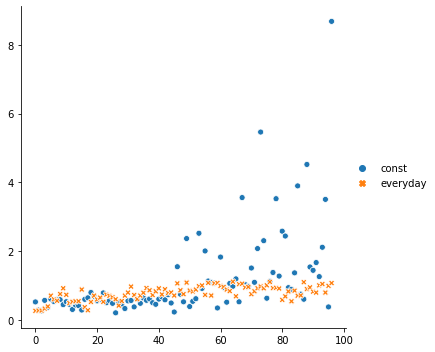

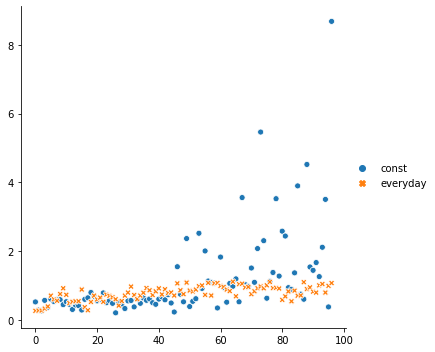

In [162]:
df = pd.DataFrame({'const':loo_const.pareto_k, 'everyday':loo_every.pareto_k})
sns.relplot(data=df)

In [163]:
df.idxmax()

const       96
everyday    64
dtype: int64

const       96
everyday    64
dtype: int64

In [164]:
def loo(sm):
    log_likelihood = 0
    for i in range(C0.shape[0]-1):
        print('\rNo, %d' % i, end='')
        data_LOO = {'T': C0.shape[0], 'T0': i+1, 'P': P, 'C0': C0, 'R0': R0, 'D0':D0}
        fit_loo = sm_const.sampling(data=data_LOO, iter=2000, init='random')
        data_loo = az.from_pystan(fit_loo, log_likelihood='log_lik')
        log_likelihood += data_loo.sample_stats['log_likelihood'].sel(log_likelihood_dim_0=i).mean()
        
    return log_likelihood

In [165]:
### Visualization ###

In [166]:
def extract(data, upto):
    index=pd.date_range(start=epoch, end=upto)
    init_inf = pd.DataFrame(data_every.posterior['init_inf'].stack(sample=('chain', 'draw')).values)
    b = pd.DataFrame(data_every.posterior['b'].stack(sample=('chain', 'draw')).values, index=index)
    q = pd.DataFrame(data_every.posterior['q'].stack(sample=('chain', 'draw')).values, index=index)
    NI = pd.DataFrame(data_every.posterior['NI'].stack(sample=('chain', 'draw')).values, index=index)
    a = pd.DataFrame(data_every.posterior['a'].stack(sample=('chain', 'draw')).values)
    d = pd.DataFrame(data_every.posterior['d'].stack(sample=('chain', 'draw')).values)
    C = NI.cumsum().shift(periods=1)
    NI0 = q*NI
    C0 = NI0.cumsum().shift(periods=1)

    return a, d, b, q, NI, NI0, C, C0

In [168]:
a_e, d_e, b_e, q_e, NI_e, NI0_e, C_e, C0_e = extract(data_every, upto=pd.to_datetime('2020-04-27'))

In [169]:
def draw(simulated, real=None, upto=pd.to_datetime('2020-04-26')):
    graph=pd.DataFrame(index=pd.date_range(start=epoch, end=upto))
    median = simulated.median(axis=1)
    upper = simulated.quantile(q=0.75, axis=1)
    lower = simulated.quantile(q=0.25, axis=1)
    if not real is None:
        graph['Real'] = real
    graph['Median'] = median
    graph['Upper'] = upper
    graph['Lower'] = lower
    sns.relplot(kind="line", data=graph, aspect=2)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


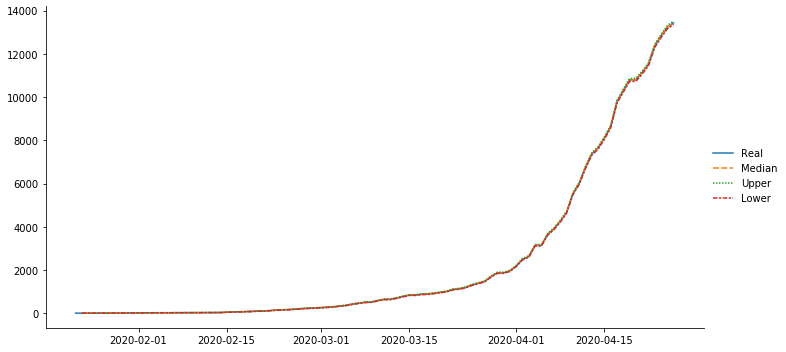

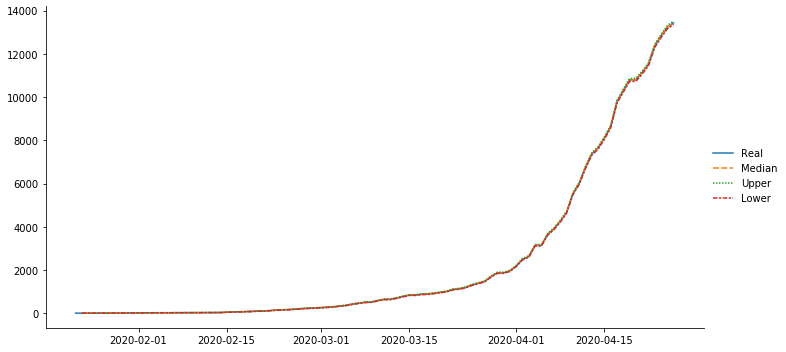

In [170]:
draw(C0_e, real=confirmed[country])

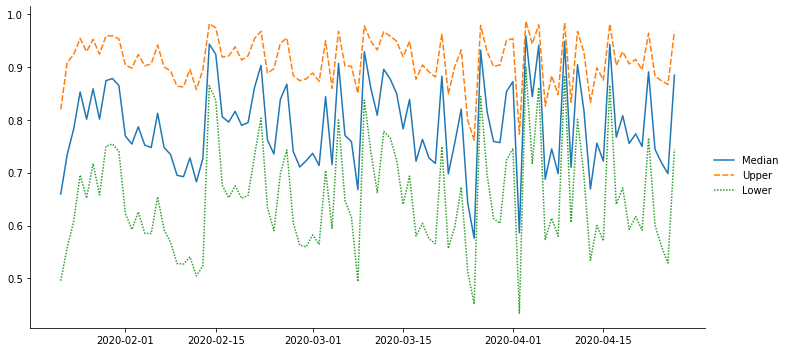

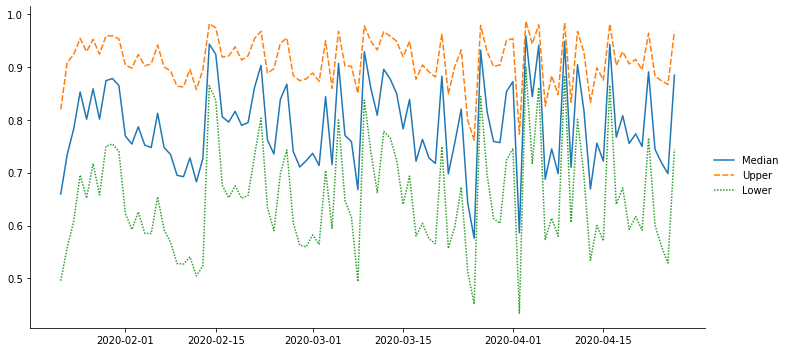

In [171]:
draw(q_e)

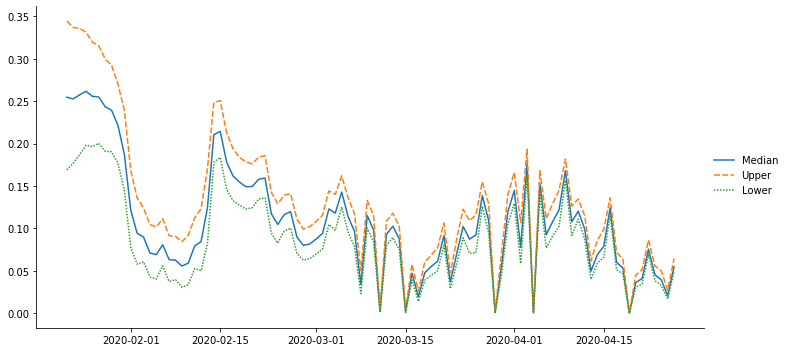

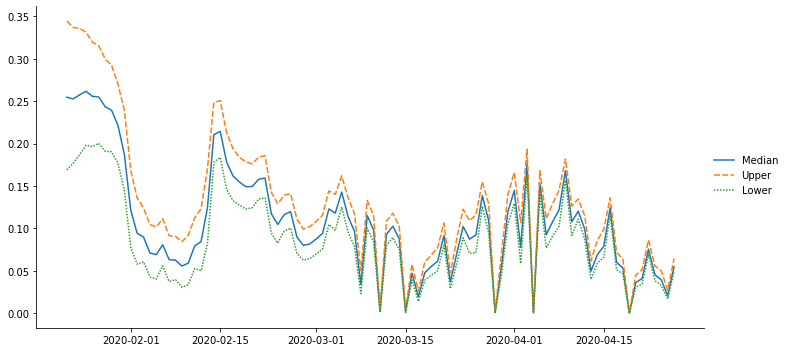

In [172]:
draw(b_e)

/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/yoriyuki/.pyenv/versions/anaconda3-5.3.1/envs/COVID-19/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


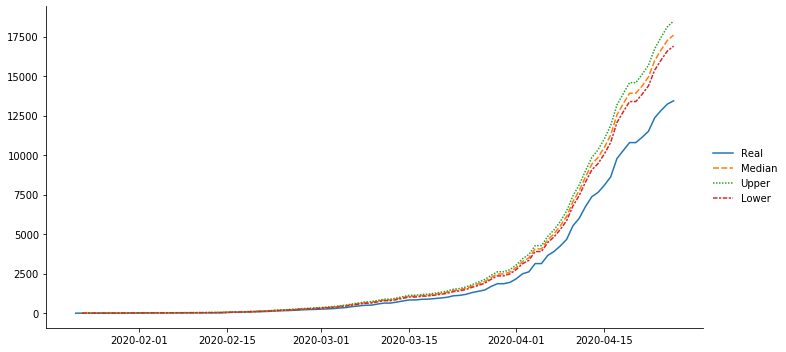

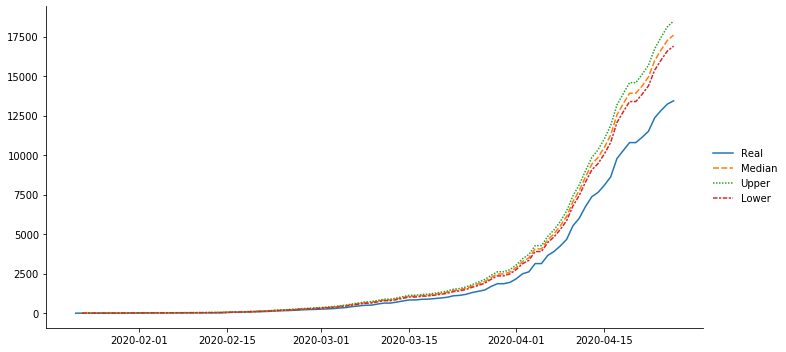

In [173]:
draw(C_e, real=confirmed[country])

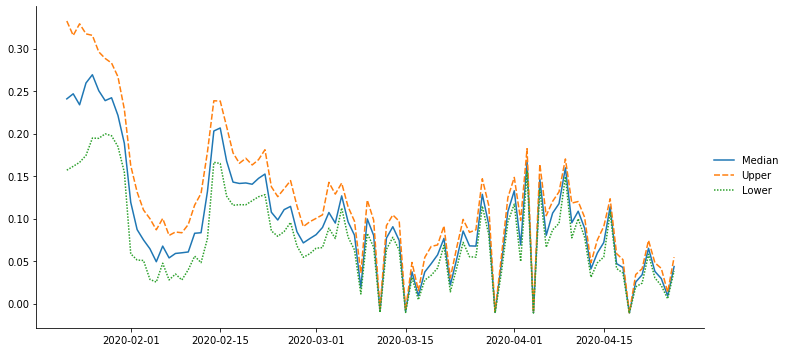

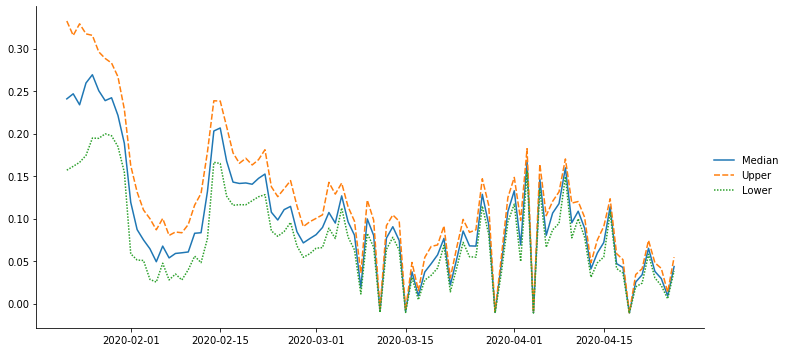

In [174]:
a = pd.DataFrame(data_every.posterior['a'].stack(sample=('chain', 'draw')).values)
d = pd.DataFrame(data_every.posterior['d'].stack(sample=('chain', 'draw')).values)
beta = pd.DataFrame(np.array([b_e[i].values - a.iloc[i].values - d.iloc[i].values for i in range(len(b_e))]).T, index=b_e.index)
draw(beta)

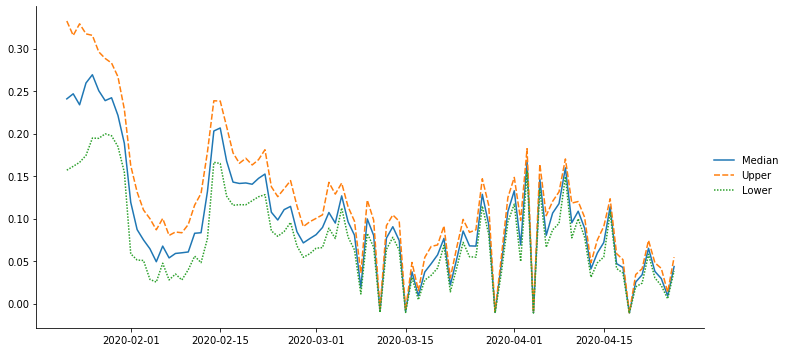

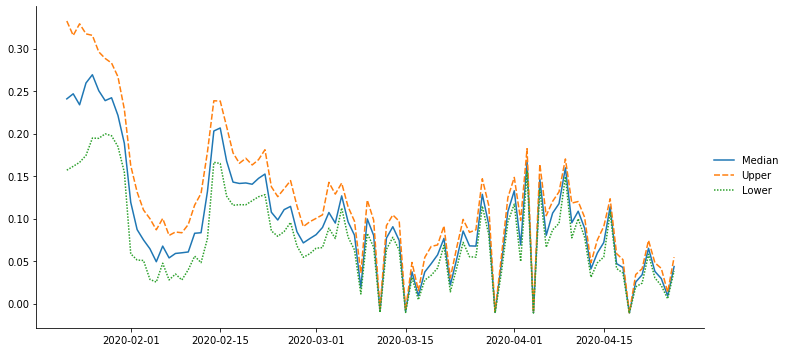

In [175]:
draw(beta)

In [176]:
beta.loc[pd.to_datetime('2020-04-24')].median()

0.02936813799165202

0.02936813799165202

In [177]:
b = data_every.posterior['b'].stack(sample=('chain', 'draw')).sel(b_dim_0=70)
q = data_every.posterior['q'].stack(sample=('chain', 'draw')).sel(q_dim_0=70)

In [178]:
b.values

array([0.14437348, 0.13817228, 0.15381727, ..., 0.14552945, 0.11196541,
       0.16895018])

array([0.14437348, 0.13817228, 0.15381727, ..., 0.14552945, 0.11196541,
       0.16895018])

In [179]:
q.values

array([0.89012695, 0.98012548, 0.94757007, ..., 0.95499429, 0.86236282,
       0.69918703])

array([0.89012695, 0.98012548, 0.94757007, ..., 0.95499429, 0.86236282,
       0.69918703])

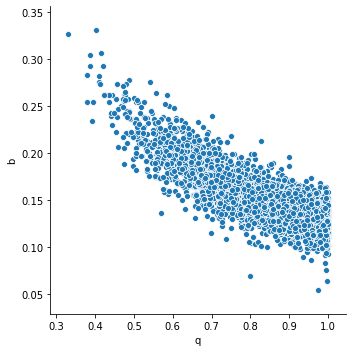

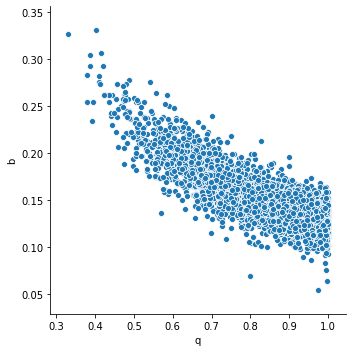

In [180]:
df = pd.DataFrame({'b':b.values, 'q':q.values})
sns.relplot(data=df, x='q', y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5f21a9450>],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5f21a9450>],
      dtype=object)

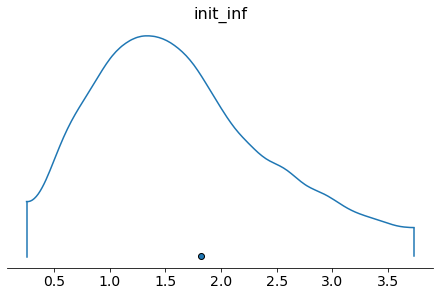

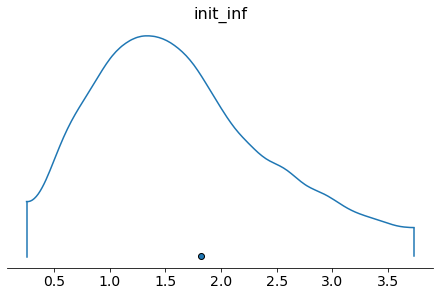

In [181]:
az.plot_density(data_every, var_names=['init_inf'])

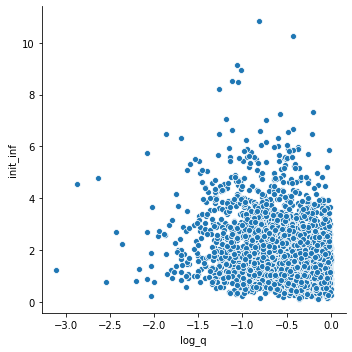

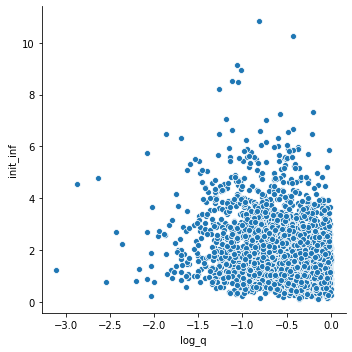

In [182]:
q = data_every.posterior['q'].stack(sample=('chain', 'draw')).sel(q_dim_0=0)
init_inf = data_every.posterior['init_inf'].stack(sample=('chain', 'draw'))
df = pd.DataFrame({'init_inf':init_inf.values, 'log_q':np.log(q.values)})
sns.relplot(data=df, x='log_q', y='init_inf')

In [183]:
sm_sens = pystan.StanModel(file="everyday-sensibility.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b81425f3d32257759b6902e2bf4e8500 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b81425f3d32257759b6902e2bf4e8500 NOW.


In [184]:
# Train the model and generate samples
inits = 'random'
fit_sens = sm_sens.sampling(data=data, iter=iteration, init=inits)
fit_sens


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_b81425f3d32257759b6902e2bf4e8500.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   2.05    0.04   1.01   0.64   1.35   1.87   2.53   4.52    613   1.01
b_beta     0.04  3.6e-4 7.0e-3   0.03   0.04   0.04   0.05   0.06    377   1.01
b[1]       0.28  8.9e-3   0.14   0.04   0.18   0.27   0.36   0.58    242   1.03
b[2]       0.28  8.3e-3   0.13   0.06   0.19   0.27   0.36   0.57    240   1.03
b[3]       0.28  7.1e-3   0.12   0.09    0.2   0.27   0.35   0.55    272   1.02
b[4]       0.28  5.1e-3    0.1   0.11   0.21   0.27   0.35   0.51    408   1.01
b[5]       0.27  4.6e-3   0.09   0.11   0.21   0.27   0.33   0.48    428   1.01
b[6]       0.27  4.0e-3   0.09   0.12   0.21   0.27   0.32   0.47    471   1.01
b[7]       0.26  3.8e-3   0.08   0.11    0.2   0.25


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_b81425f3d32257759b6902e2bf4e8500.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
init_inf   2.05    0.04   1.01   0.64   1.35   1.87   2.53   4.52    613   1.01
b_beta     0.04  3.6e-4 7.0e-3   0.03   0.04   0.04   0.05   0.06    377   1.01
b[1]       0.28  8.9e-3   0.14   0.04   0.18   0.27   0.36   0.58    242   1.03
b[2]       0.28  8.3e-3   0.13   0.06   0.19   0.27   0.36   0.57    240   1.03
b[3]       0.28  7.1e-3   0.12   0.09    0.2   0.27   0.35   0.55    272   1.02
b[4]       0.28  5.1e-3    0.1   0.11   0.21   0.27   0.35   0.51    408   1.01
b[5]       0.27  4.6e-3   0.09   0.11   0.21   0.27   0.33   0.48    428   1.01
b[6]       0.27  4.0e-3   0.09   0.12   0.21   0.27   0.32   0.47    471   1.01
b[7]       0.26  3.8e-3   0.08   0.11    0.2   0.25

In [185]:
data_sens = az.from_pystan(fit_sens, log_likelihood='log_lik')

In [192]:
index=pd.date_range(start=epoch, end=pd.to_datetime('2020-04-27'))

In [193]:
init_inf_sens = pd.DataFrame(data_sens.posterior['init_inf'].stack(sample=('chain', 'draw')).values)
b_sens = pd.DataFrame(data_sens.posterior['b'].stack(sample=('chain', 'draw')).values, index=index)
q_sens = pd.DataFrame(data_sens.posterior['q'].stack(sample=('chain', 'draw')).values, index=index)



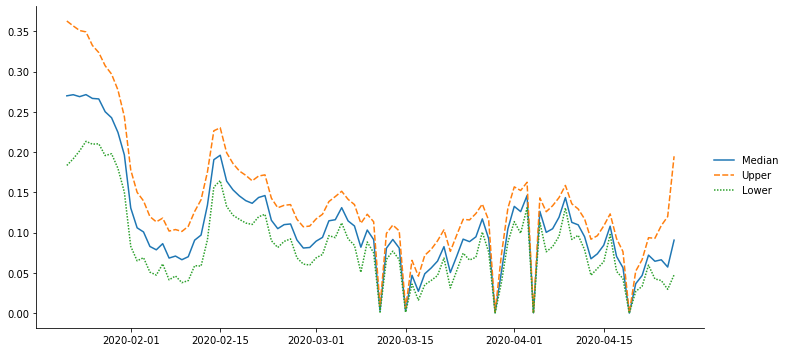

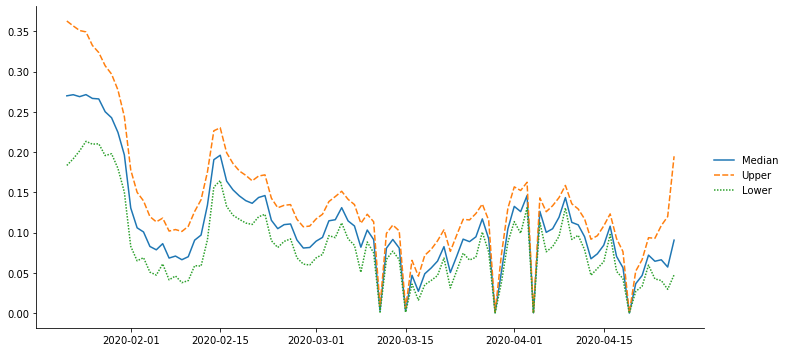

In [194]:
draw(b_sens)

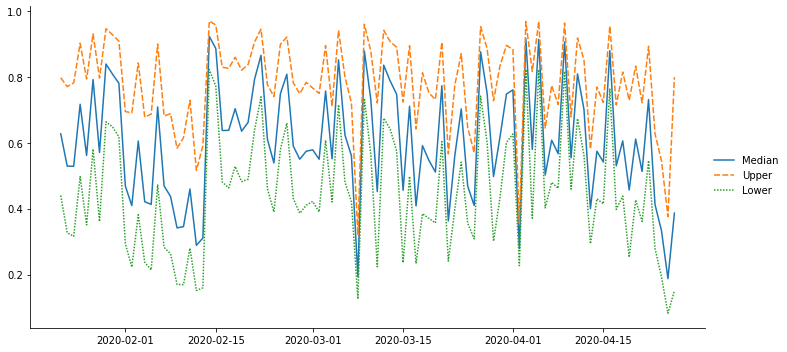

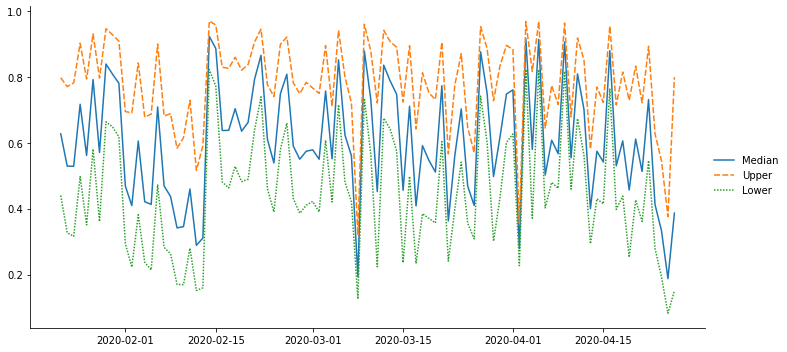

In [195]:
draw(q_sens)

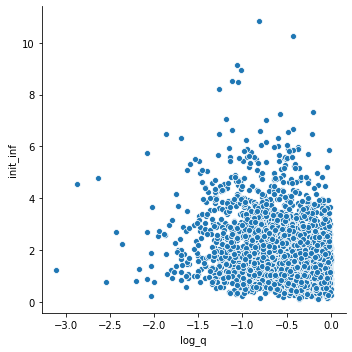

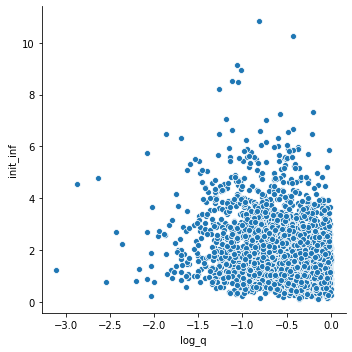

In [196]:
df = pd.DataFrame({'init_inf':init_inf.values, 'log_q':np.log(q.values)})
sns.relplot(data=df, x='log_q', y='init_inf')

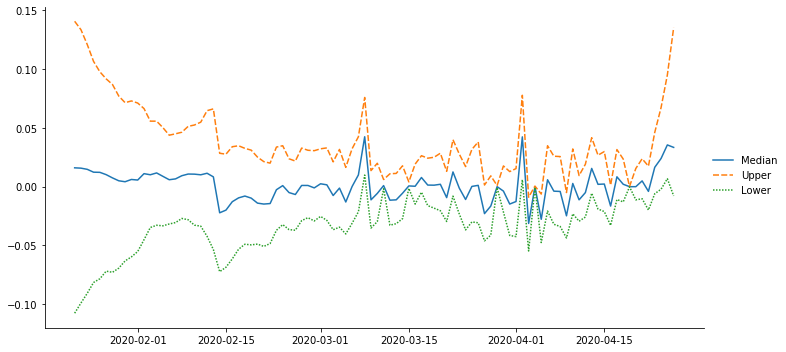

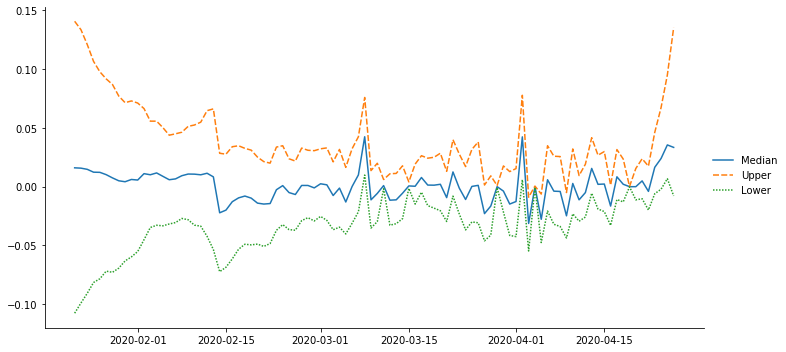

In [197]:
draw(b_sens-b_e)

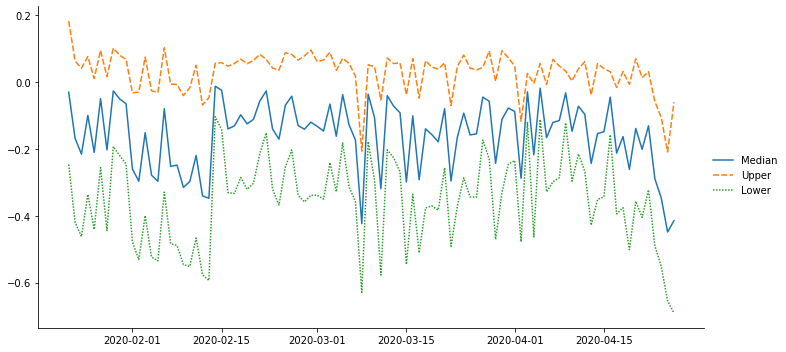

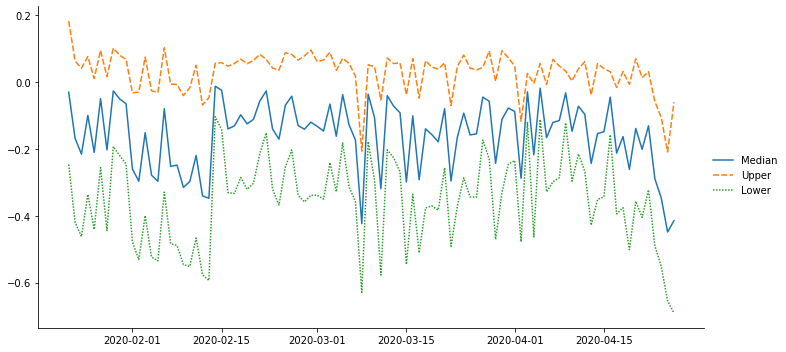

In [198]:
draw(q_sens-q_e)

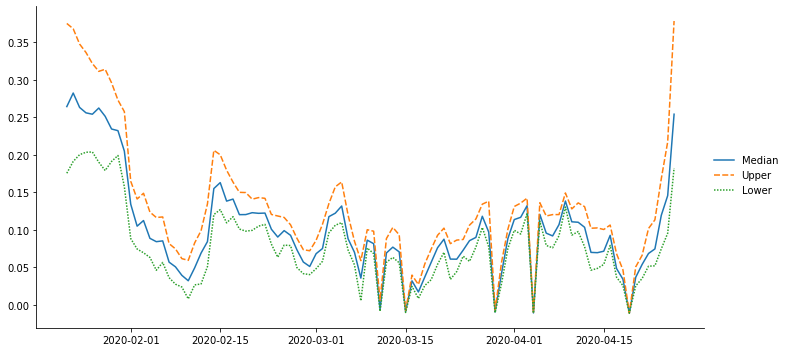

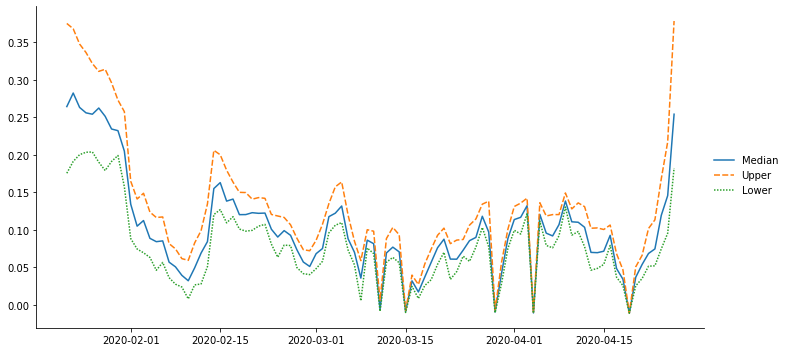

In [199]:
a_s = pd.DataFrame(data_sens.posterior['a'].stack(sample=('chain', 'draw')).values)
d_s = pd.DataFrame(data_sens.posterior['d'].stack(sample=('chain', 'draw')).values)
beta_s = pd.DataFrame(np.array([b_sens[i].values - a_s.iloc[i].values - d_s.iloc[i].values for i in range(len(b_sens))]).T, index=b_sens.index)
draw(beta_s)

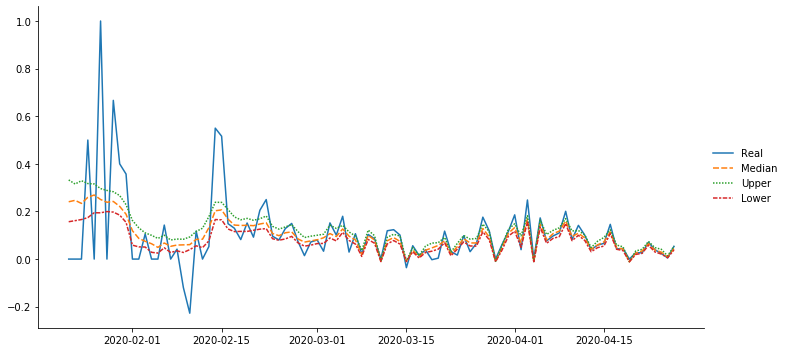

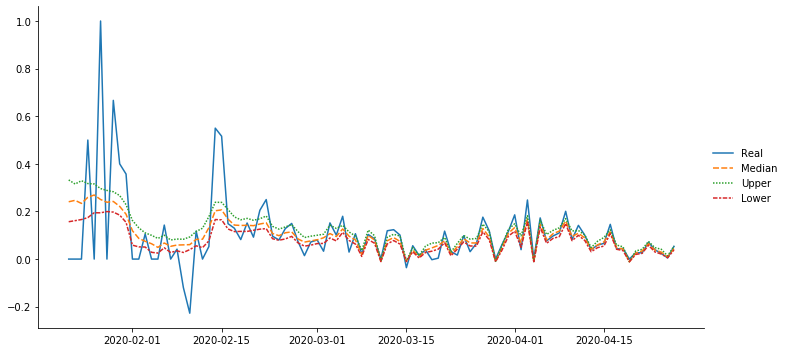

In [200]:
infected = (confirmed-recovered)[country]
r=infected.shift(-1)/infected-1
draw(beta, real=r)

In [201]:
beta.loc[pd.to_datetime("2020-04-01"):].mean(axis=1)

2020-04-01    0.134984
2020-04-02    0.074633
2020-04-03    0.174225
2020-04-04   -0.010597
2020-04-05    0.151620
2020-04-06    0.086421
2020-04-07    0.106143
2020-04-08    0.115632
2020-04-09    0.160371
2020-04-10    0.098462
2020-04-11    0.112328
2020-04-12    0.091879
2020-04-13    0.042048
2020-04-14    0.063773
2020-04-15    0.074322
2020-04-16    0.117956
2020-04-17    0.050748
2020-04-18    0.044945
2020-04-19   -0.011123
2020-04-20    0.028406
2020-04-21    0.035199
2020-04-22    0.070926
2020-04-23    0.039882
2020-04-24    0.033294
2020-04-25    0.012817
2020-04-26    0.047675
2020-04-27   -0.011164
Freq: D, dtype: float64

2020-04-01    0.134984
2020-04-02    0.074633
2020-04-03    0.174225
2020-04-04   -0.010597
2020-04-05    0.151620
2020-04-06    0.086421
2020-04-07    0.106143
2020-04-08    0.115632
2020-04-09    0.160371
2020-04-10    0.098462
2020-04-11    0.112328
2020-04-12    0.091879
2020-04-13    0.042048
2020-04-14    0.063773
2020-04-15    0.074322
2020-04-16    0.117956
2020-04-17    0.050748
2020-04-18    0.044945
2020-04-19   -0.011123
2020-04-20    0.028406
2020-04-21    0.035199
2020-04-22    0.070926
2020-04-23    0.039882
2020-04-24    0.033294
2020-04-25    0.012817
2020-04-26    0.047675
2020-04-27   -0.011164
Freq: D, dtype: float64

In [204]:
r.loc[pd.to_datetime("2020-03-01"):]

2020-03-01    0.080357
2020-03-02    0.033058
2020-03-03    0.152000
2020-03-04    0.100694
2020-03-05    0.179811
2020-03-06    0.029412
2020-03-07    0.106494
2020-03-08    0.021127
2020-03-09    0.103448
2020-03-10    0.085417
2020-03-11    0.000000
2020-03-12    0.119002
2020-03-13    0.123499
2020-03-14    0.100763
2020-03-15   -0.036061
2020-03-16    0.056115
2020-03-17    0.014986
2020-03-18    0.038926
2020-03-19   -0.002584
2020-03-20    0.003886
2020-03-21    0.117419
2020-03-22    0.031178
2020-03-23    0.016797
2020-03-24    0.098018
2020-03-25    0.031093
2020-03-26    0.066148
2020-03-27    0.176095
2020-03-28    0.118697
2020-03-29    0.000000
2020-03-30    0.060333
2020-03-31    0.115762
2020-04-01    0.185815
2020-04-02    0.039545
2020-04-03    0.248217
2020-04-04    0.000000
2020-04-05    0.172952
2020-04-06    0.076323
2020-04-07    0.096862
2020-04-08    0.110041
2020-04-09    0.200743
2020-04-10    0.082147
2020-04-11    0.141713
2020-04-12    0.100234
2020-04-13 

2020-03-01    0.080357
2020-03-02    0.033058
2020-03-03    0.152000
2020-03-04    0.100694
2020-03-05    0.179811
2020-03-06    0.029412
2020-03-07    0.106494
2020-03-08    0.021127
2020-03-09    0.103448
2020-03-10    0.085417
2020-03-11    0.000000
2020-03-12    0.119002
2020-03-13    0.123499
2020-03-14    0.100763
2020-03-15   -0.036061
2020-03-16    0.056115
2020-03-17    0.014986
2020-03-18    0.038926
2020-03-19   -0.002584
2020-03-20    0.003886
2020-03-21    0.117419
2020-03-22    0.031178
2020-03-23    0.016797
2020-03-24    0.098018
2020-03-25    0.031093
2020-03-26    0.066148
2020-03-27    0.176095
2020-03-28    0.118697
2020-03-29    0.000000
2020-03-30    0.060333
2020-03-31    0.115762
2020-04-01    0.185815
2020-04-02    0.039545
2020-04-03    0.248217
2020-04-04    0.000000
2020-04-05    0.172952
2020-04-06    0.076323
2020-04-07    0.096862
2020-04-08    0.110041
2020-04-09    0.200743
2020-04-10    0.082147
2020-04-11    0.141713
2020-04-12    0.100234
2020-04-13 